In [1]:
import numpy as np
import matplotlib.pyplot as plt

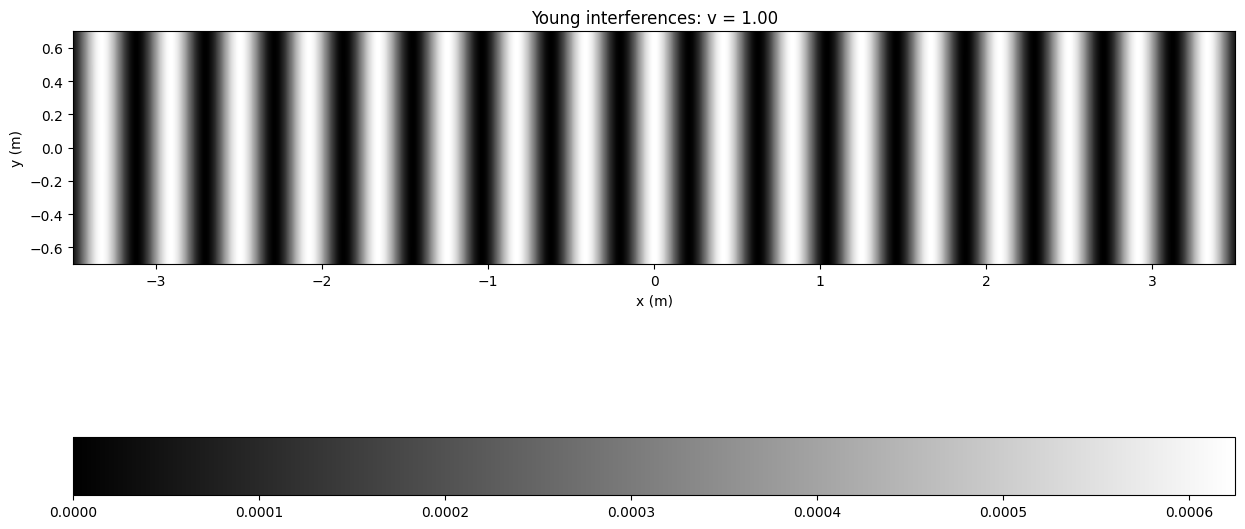

In [56]:
d = 0.1e-3  # m -> mina de lapis
D = 80  # m -> distancia a la pantalla
L = 3.5  # m -> mida pantalla
lamb = 520e-9  # m -> verd 520nm=520e-6mm
A1 = 1
A2 = 1

ratio = 5  # aspect ratio: Lx = ratio x Ly


N = 1000
side_range = np.linspace(-L, L, N)
x, y = np.meshgrid(side_range, -side_range/ratio)

d1 = np.sqrt((x+d/2)**2 + y**2 + D**2)
d2 = np.sqrt((x-d/2)**2 + y**2 + D**2)

young_inter = (A1/d1)**2 + (A2/d2)**2 + 2*A1/d1*A2/d2*np.cos(2*np.pi/lamb*(d2-d1))


v = (young_inter.max() - young_inter.min()) / (young_inter.max() + young_inter.min())


plt.figure(figsize=(15,15))
plt.imshow(young_inter, extent=[-L, L, -L/ratio, L/ratio], cmap='gray', vmin=0, vmax=young_inter.max())
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title(f'Young interferences: v = {v:.2f}')
plt.colorbar(location='bottom')